In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load movies metadata
movies_df = pd.read_csv('movies_metadata.csv', low_memory=False)

# Display the first few rows to understand the structure
movies_df.head()


adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [3]:
# Drop rows with missing titles
movies_df = movies_df.dropna(subset=['title', 'genres', 'production_companies'])

# Display the first few rows to confirm
movies_df[['title', 'genres', 'production_companies']].head()


title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                                production_companies  
0     [{'name': 'Pixar Animation Studios', 'id': 3}]  
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...  
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...  
3  [{'name': 'Twentieth Century Fox Film Corporat...  
4  [{'name': 'Sandollar Productions', 'id': 5842}...

In [4]:
import ast

# Function to parse JSON-like fields
def parse_field(data):
    try:
        return [item['name'] for item in ast.literal_eval(data)]
    except (ValueError, SyntaxError):
        return []

# Apply the function to genres and production companies
movies_df['genres'] = movies_df['genres'].apply(parse_field)
movies_df['production_companies'] = movies_df['production_companies'].apply(parse_field)

# Display processed fields
movies_df[['title', 'genres', 'production_companies']].head()


title                        genres  \
0                    Toy Story   [Animation, Comedy, Family]   
1                      Jumanji  [Adventure, Fantasy, Family]   
2             Grumpier Old Men             [Romance, Comedy]   
3            Waiting to Exhale      [Comedy, Drama, Romance]   
4  Father of the Bride Part II                      [Comedy]   

                                production_companies  
0                          [Pixar Animation Studios]  
1  [TriStar Pictures, Teitler Film, Interscope Co...  
2                     [Warner Bros., Lancaster Gate]  
3           [Twentieth Century Fox Film Corporation]  
4       [Sandollar Productions, Touchstone Pictures]

In [5]:
# Initialize lists for relationships
movie_genre_edges = []
movie_company_edges = []

# Populate relationships
for _, row in movies_df.iterrows():
    movie = row['title']
    for genre in row['genres']:
        movie_genre_edges.append((movie, genre))
    for company in row['production_companies']:
        movie_company_edges.append((movie, company))


In [6]:
# Initialize the graph
G = nx.Graph()

# Add nodes and edges for genres
for movie, genre in movie_genre_edges:
    G.add_node(movie, type='movie')
    G.add_node(genre, type='genre')
    G.add_edge(movie, genre, relationship='belongs_to_genre')

# Add nodes and edges for production companies
for movie, company in movie_company_edges:
    G.add_node(company, type='company')
    G.add_edge(movie, company, relationship='produced_by')

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Graph has 63701 nodes and 157939 edges.


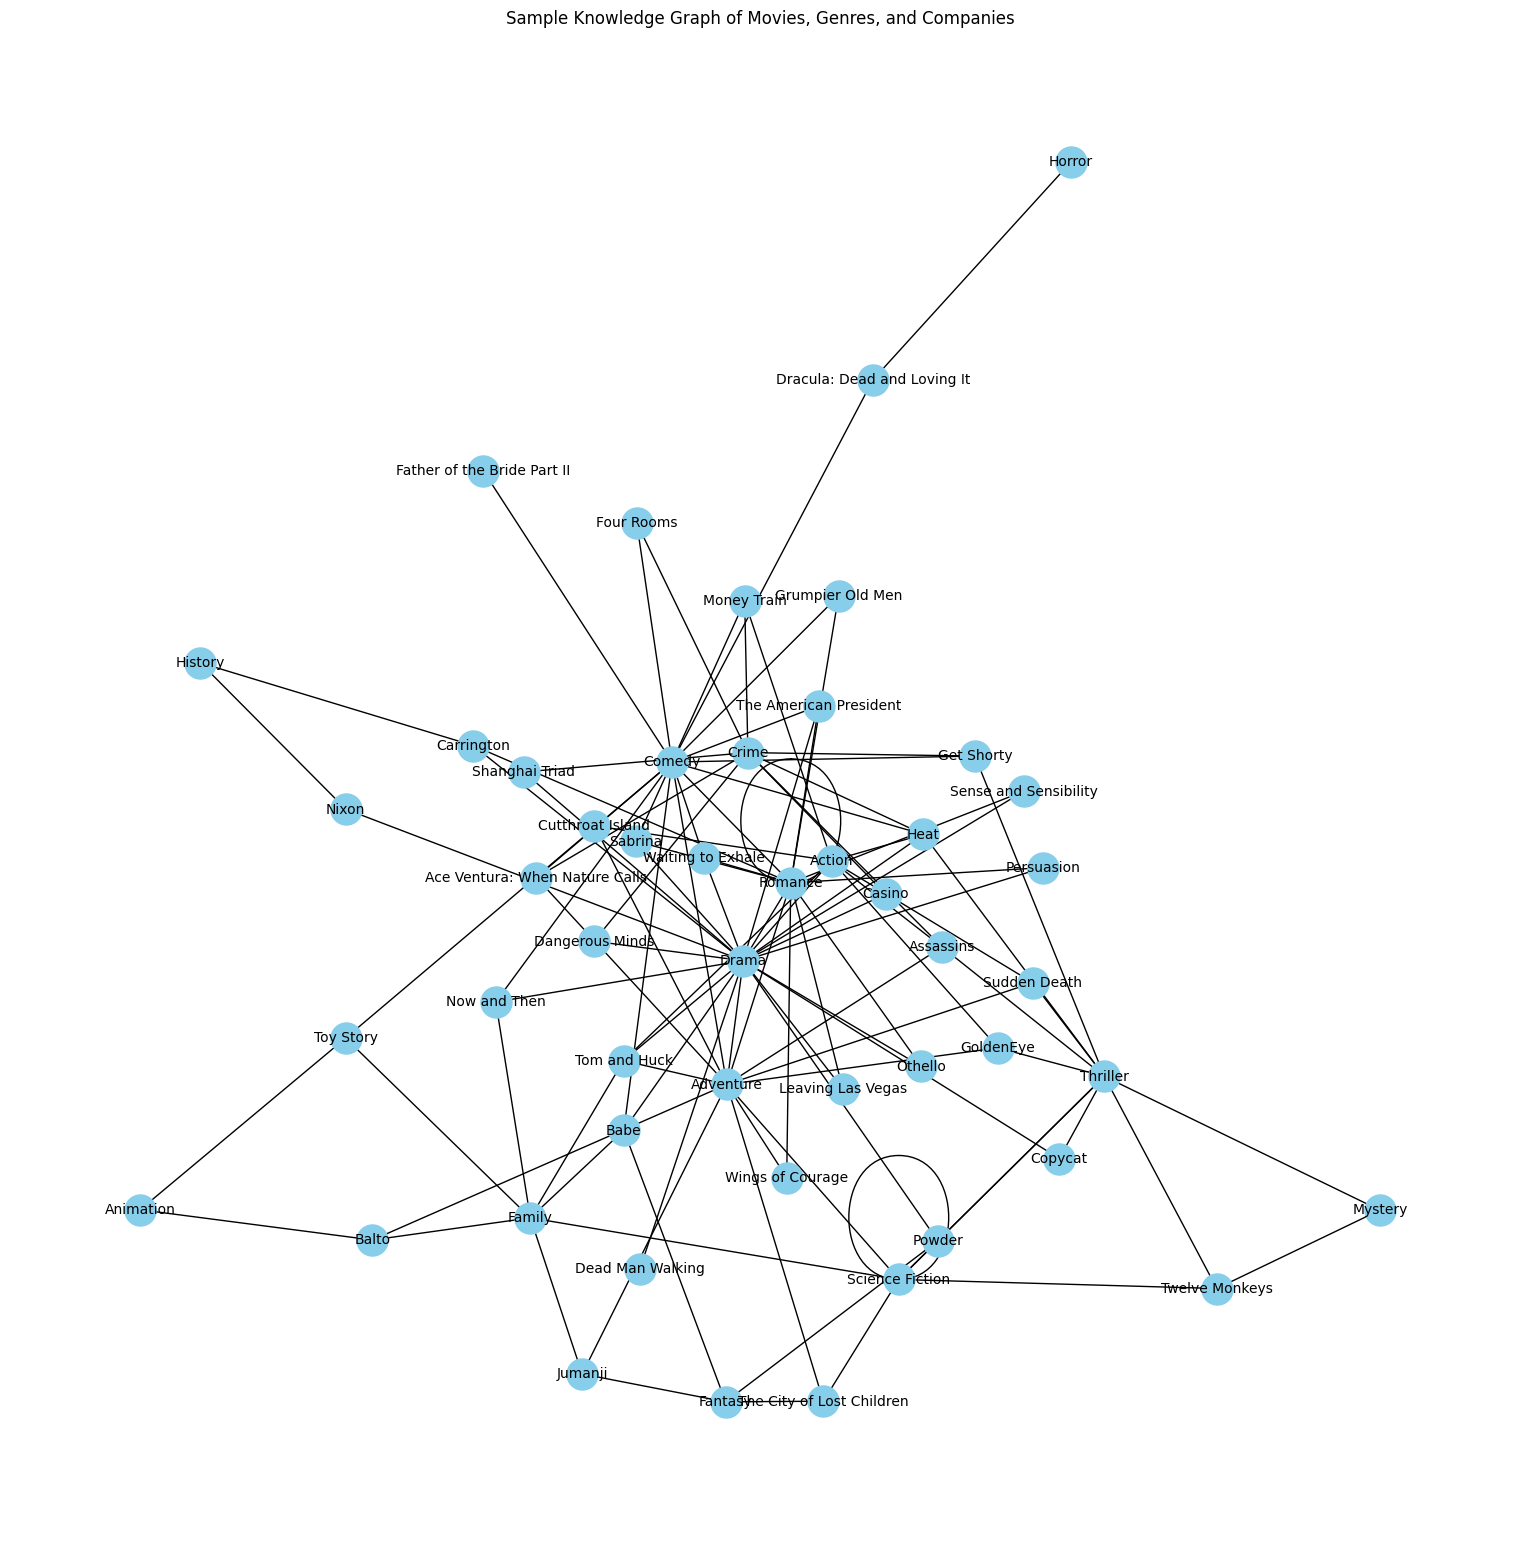

In [8]:
# Extract a subgraph for visualization (e.g., 50 nodes)
subgraph = G.subgraph(list(G.nodes)[:50])

# Plot the subgraph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(subgraph, k=0.3)
nx.draw(subgraph, pos, with_labels=True, node_size=500, font_size=10, node_color="skyblue")
plt.title("Sample Knowledge Graph of Movies, Genres, and Companies")
plt.show()


In [12]:
# Function to get genres of a specific movie
def get_movie_genres(graph, movie_name):
    return [node for node, attr in graph[movie_name].items() if attr['relationship'] == 'belongs_to_genre']

# Example: Get genres of a specific movie
movie_name = "Balto"  # Change as per dataset
print(f"Genres for {movie_name}: {get_movie_genres(G, movie_name)}")


Genres for Balto: ['Family', 'Animation', 'Adventure']
